In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
#!unzip gdrive/My\ Drive/data/train.zip
!unzip gdrive/MyDrive/AFLW2000-3D.zip

Archive:  gdrive/MyDrive/AFLW2000-3D.zip
   creating: AFLW2000/
   creating: AFLW2000/Code/
  inflating: AFLW2000/Code/DrawSolidHead.m  
  inflating: AFLW2000/Code/DrawTextureHead.m  
  inflating: AFLW2000/Code/main_show_without_BFM.m  
  inflating: AFLW2000/Code/main_show_with_BFM.m  
   creating: AFLW2000/Code/Mex/
  inflating: AFLW2000/Code/Mex/compile.m  
  inflating: AFLW2000/Code/Mex/Tnorm_Vnorm.h  
  inflating: AFLW2000/Code/Mex/Tnorm_VnormC.cpp  
  inflating: AFLW2000/Code/Mex/Tnorm_VnormC.mexw64  
   creating: AFLW2000/Code/ModelGeneration/
  inflating: AFLW2000/Code/ModelGeneration/ModelGenerate.m  
  inflating: AFLW2000/Code/ModelGeneration/model_info.mat  
  inflating: AFLW2000/Code/Model_Exp.mat  
  inflating: AFLW2000/Code/Model_Shape_Sim.mat  
  inflating: AFLW2000/Code/NormDirection.m  
  inflating: AFLW2000/Code/readme.txt  
  inflating: AFLW2000/Code/RotationMatrix.m  
  inflating: AFLW2000/Code/Tnorm_VnormC.mexw64  
  inflating: AFLW2000/image00002.jpg  
  inflating:

In [4]:
%%capture
!pip install mediapipe

In [5]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

In [6]:
# Just needed in case you'd like to append it to an array
data = []
count=0
for filename in os.listdir("/content/AFLW2000"):
    if filename.endswith("jpg"): 
        # Your code comes here such as 
        #print(filename)
        count+=1
        data.append(filename)
#check if it have the same numbr of file
print(count)
print(data[0][:-4])

2000
image03677


In [7]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [8]:
# choosing random image
random_file = 'image02045'
flag=True
di=dict()
lips_x=[]
lips_y=[]
nose_x=[]
nose_y=[]
chain_x=[]
chain_y=[]
lft_eye_x=[]
right_eye_x=[]
lft_eye_y=[]
right_eye_y=[]
forhead_x=[]
forhead_y=[]
faceModule = mediapipe.solutions.face_mesh
not_count=[]
for i in range(len(data)):  
        #choosing the image
        
        random_file=data[i][:-4]
       
        # loading image and its correspinding mat file
        with faceModule.FaceMesh(static_image_mode=True) as faces:
            # loading the image
            image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg') #numpyarray
            # processing the face to extract the landmark points (468 point) for each x,y,z
            results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            if results.multi_face_landmarks != None: 
              # looping over the faces in the image            
              for face in results.multi_face_landmarks:
                  #converting to data dictionary then to data frame  
                  
                  lips_x.append(face.landmark[14].x)
                  lips_y.append(face.landmark[14].y)
                  
                  nose_x.append(face.landmark[94].x)
                  nose_y.append(face.landmark[94].y)

                  chain_x.append(face.landmark[199].x)
                  chain_y.append(face.landmark[199].y)

                  lft_eye_x.append(face.landmark[359].x)
                  lft_eye_y.append(face.landmark[359].y)

                  right_eye_x.append(face.landmark[430].x)
                  right_eye_y.append(face.landmark[430].y)

                  forhead_x.append(face.landmark[9].x)
                  forhead_y.append(face.landmark[9].y)
                  for landmark in face.landmark:  
                      x = landmark.x
                      y = landmark.y                    
                      # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                      shape = image.shape 
                      relative_x = int(x * shape[1])
                      relative_y = int(y * shape[0])
                      # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
                      cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
            else:
                not_count.append(i)   
#cv2_imshow(image)
di["lips_x"]=lips_x
di["lips_y"]=lips_y
di["nose_x"]=nose_x
di["nose_y"]=nose_y
di["chain_x"]=chain_x
di["chain_y"]=chain_y  
di["lft_eye_x"]=lft_eye_x
di["lft_eye_y"]=lft_eye_y
di["right_eye_x"]=right_eye_x 
di["right_eye_y"]=right_eye_y 
di["forhead_x"]=forhead_x
di["forhead_y"]=forhead_y
df=pd.DataFrame.from_dict(di)
print(di)
df.head()
df.shape
#df.drop_duplicates()       

{'lips_x': [0.5212594270706177, 0.5056952834129333, 0.4790143072605133, 0.5241895914077759, 0.5278458595275879, 0.5676195621490479, 0.4701642096042633, 0.45868778228759766, 0.512769341468811, 0.5192829370498657, 0.38085654377937317, 0.5310025811195374, 0.4990573823451996, 0.5179129838943481, 0.5289413928985596, 0.5350480079650879, 0.5070483684539795, 0.547042191028595, 0.5234146118164062, 0.5131276845932007, 0.5247977375984192, 0.5177108645439148, 0.4870153069496155, 0.5548752546310425, 0.5375733971595764, 0.510955810546875, 0.49486348032951355, 0.5144864320755005, 0.4814859628677368, 0.5798730850219727, 0.5178219676017761, 0.4412931203842163, 0.4923534393310547, 0.525408148765564, 0.5028876066207886, 0.5159882307052612, 0.5581128597259521, 0.4585803747177124, 0.49590978026390076, 0.4716770648956299, 0.5295189023017883, 0.5066115856170654, 0.5079306364059448, 0.5545855760574341, 0.5637083053588867, 0.5274633765220642, 0.5158567428588867, 0.518970251083374, 0.5384517312049866, 0.4397118

(1853, 12)

In [9]:
data2 = []
count=0
for filename in os.listdir("/content/AFLW2000"):
    if filename.endswith("mat"): 
        # Your code comes here such as 
        #print(filename)
        count+=1
        data2.append(filename)
#check if it have the same numbr of file
print(count)
print(data[1][:-4])
print(data2[1][:-4])

2000
image01191
image01641


[-0.28003293  0.30830863 -0.07272681]


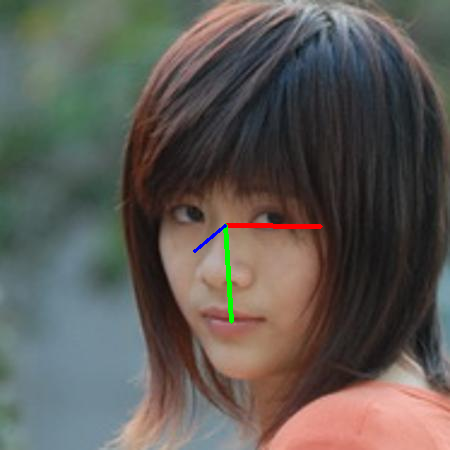

In [10]:
# for i in range(len(data)):
#   random_file=data[i][:-4]
dic_angle=dict()
pitch=[]
roll=[]
yaw=[]

image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
# loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
mat_file = sio.loadmat('/content/AFLW2000/'+random_file+'.mat')
# extracting the labels 3 angels
print(mat_file["Pose_Para"][0][:3])
pose_para = mat_file["Pose_Para"][0][:3]

pitch = pose_para[0]
yaw = pose_para[1]
roll = pose_para[2]

#to draw the image
cv2_imshow(draw_axis(image,pitch,yaw,roll))

In [11]:
# mat_file = sio.loadmat('/content/AFLW2000/'+random_file+'.mat')
# mat_file

# trying to do the same as above 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
33
34
35
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
79
80
81
82
83
84
86
87
88
89
90
91
92
93
94
95
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
132
133
134
135
136
137
138
139
140
142
143
144
145
146
147
148
149
150
154
155
156
157
158
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
177
178
179
180
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
247
248
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
283
284
285
286
288
289
290
291
292
293
294
295


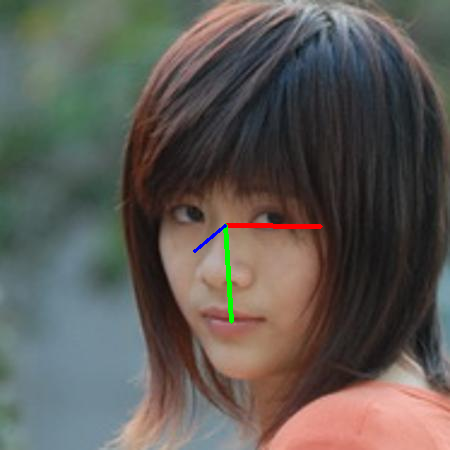

In [12]:
dic_angle=dict()
pch=[]
rll=[]
yw=[]
for i in range(len(data)):
     if i not in not_count: 
        print(i)
        random_file=data[i][:-4]
        image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
        # loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
        mat_file = sio.loadmat('/content/AFLW2000/'+random_file+'.mat')
        # extracting the labels 3 angels
        pose_para = mat_file["Pose_Para"][0][:3]

        pitch = pose_para[0]
        yaw = pose_para[1]
        roll = pose_para[2]
        pch.append(pitch)
        yw.append(yaw)
        rll.append(roll)  
dic_angle["yaw"]=yw 
dic_angle["roll"]=rll
dic_angle["pitch"]=pch
label=pd.DataFrame.from_dict(dic_angle)     
# print(label.shape)
# print(label.drop_duplicates())
print(label.shape)
#to draw the image
cv2_imshow(draw_axis(image,pitch,yaw,roll))

In [13]:
result = pd.concat([df, label], axis=1)
result.head()

,lips_x,lips_y,nose_x,nose_y,chain_x,chain_y,lft_eye_x,lft_eye_y,right_eye_x,right_eye_y,forhead_x,forhead_y,yaw,roll,pitch
0,0.521259,0.717524,0.543594,0.643285,0.515517,0.804441,0.588750,0.487403,0.571936,0.722158,0.517750,0.447407,-0.546056,-0.039170,-0.056755
1,0.505695,0.693317,0.496281,0.633867,0.513646,0.771299,0.651647,0.478696,0.626878,0.712466,0.493562,0.436669,0.101677,-0.092408,-0.281652
2,0.479014,0.714293,0.489970,0.639205,0.471430,0.807405,0.679713,0.489982,0.604926,0.761829,0.516864,0.405323,-0.001044,0.134020,-0.167544
3,0.524190,0.697947,0.495633,0.641493,0.552820,0.772121,0.616737,0.458573,0.658648,0.693288,0.451013,0.452493,0.179634,-0.279035,-0.284801
4,0.527846,0.677433,0.549671,0.621395,0.519144,0.739439,0.555622,0.494628,0.539998,0.674500,0.526616,0.475504,-0.847588,-0.069291,-0.416449


In [14]:
from google.colab import files
result.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
from google.colab import files
uploaded = files.upload()

In [16]:
#import io
import pandas as pd

d_F = pd.read_csv('/content/output.csv')

In [17]:
d_F.drop(columns=d_F.columns[0], axis=1,  inplace=True)

In [18]:
#testing the drops
d_F.head()
print(d_F.shape)
X=d_F.iloc[:,:-3]
X.head()
#testing it after iloc
print(X.shape)
y=d_F.iloc[:,-3:]
y.head()
print(y.shape)

(1853, 15)
(1853, 12)
(1853, 3)


In [19]:
#linear regression 

In [20]:
#building the model now
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# assiging feature ,label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train) #accuracy for 
reg.score(X_train, y_train)
reg.score(X_test, y_test)
#-----------------------------------#
# testing the model  
#reg.predict(X_test)

0.24176806851330376

In [21]:
#using random forest regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=1,bootstrap=False, n_jobs=-1)
regr.fit(X, y)
z=regr.score(X_train,y_train)
print(z)
regr.score(X_test,y_test)
#regr.predict(X_test)

0.9708332619935138


0.9897387044408669

In [22]:
d_F = pd.read_csv('/content/output.csv')
d_F.drop(columns=d_F.columns[0], axis=1,  inplace=True)

#using random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
regr = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=1,bootstrap=False, n_jobs=-1)

X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values
regr.fit(X_train, y_train)
z=regr.score(X_train,y_train)
print(z)
regr.score(X_test,y_test)
#print(X_test.iloc[0,:])
#regr.predict(X_test)

0.9682834267728063


-0.8714524779970753

In [23]:
# final we predict and then  read and write to video   

In [33]:
#face_mesh
faceModule = mediapipe.solutions.face_mesh

# Establish capture
#cap = cv2.VideoCapture('final_vid2.mp4')
cap=cv2.VideoCapture('/content/final_vid.mp4')

# Properties
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = cap.get(cv2.CAP_PROP_FPS)
print(fps)
# Video Writer  /content/final_vid.mp4
#video_writer = cv2.VideoWriter("final_out2.mp4", cv2.VideoWriter_fourcc('P','I','M','1'), fps, (width, height)) 
#video_writer = cv2.VideoWriter('/content/final_out2.mp4', cv2.VideoWriter_fourcc('P','I','M','1'), fps, (width, height)) 
video_writer = cv2.VideoWriter('/content/final_out2.mp4', cv2.VideoWriter_fourcc(*'DIVX'), int(fps), (width, height)) 

# Loop through each frame
for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    # Read frame 
    ret, frame = cap.read()
    
    # loading image and its correspinding mat file
    #note try to put it and with note faceModule.FaceMesh(static_image_mode=True)
    with faceModule.FaceMesh() as faces:
        #image = cv2.imread(frame)
        # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks != None:
            for face in results.multi_face_landmarks:
                #converting to data dictionary then to data frame  
                lips_x=face.landmark[14].x
                lips_y=face.landmark[14].y

                nose_x=face.landmark[94].x
                nose_y=face.landmark[94].y

                chain_x=face.landmark[199].x
                chain_y=face.landmark[199].y

                lft_eye_x=face.landmark[359].x
                lft_eye_y=face.landmark[359].y

                right_eye_x=face.landmark[430].x
                right_eye_y=face.landmark[430].y

                forhead_x=face.landmark[9].x
                forhead_y=face.landmark[9].y
            print(forhead_y)    
            # Show image
            #cv2.imshow('Video Player', frame)
            z=np.array([lips_x,lips_y,nose_x,nose_y,chain_x,chain_y,lft_eye_x,lft_eye_y,
                                 right_eye_x,right_eye_y,forhead_x,forhead_y]).reshape(1,-1)         
            #print(z)
            #[yaw,roll,pitch]
            a=regr.predict(z)
            #print(a[0][1])
            newframe=draw_axis(frame,a[0][2],a[0][0],a[0][1],nose_x*width,nose_y*height)
            flipped_frame = cv2.flip(newframe, -1)

            # Write out frame 
            video_writer.write(flipped_frame)
            cv2.waitKey(int(2000/fps))
            #video_writer.write(frame)
            
            # Breaking out of the loop
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
            
# Close down everything
cap.release()
cv2.destroyAllWindows()
# Release video writer
video_writer.release()
from google.colab import files
files.download('final_out2.mp4') 

30.00677572355048
0.4202180504798889
0.45646318793296814
0.4388037323951721
0.40928271412849426
0.4050526022911072
0.41539067029953003
0.3296118974685669
0.3173171281814575
0.32854849100112915
0.32545995712280273
0.33535099029541016
0.37686359882354736
0.3149900436401367
0.30857759714126587
0.3349885940551758
0.31445083022117615
0.23838931322097778
0.24424825608730316
0.28601202368736267
0.3198379874229431
0.3583352565765381
0.419497549533844
0.40657520294189453
0.39189717173576355
0.347993403673172
0.36746641993522644
0.34547191858291626
0.384467750787735
0.40507933497428894
0.402688592672348
0.35930368304252625
0.370507150888443
0.32255828380584717
0.3217885494232178
0.383276104927063
0.38177093863487244
0.361571729183197
0.4475145936012268
0.336702823638916
0.4334074854850769
0.4047395884990692
0.4354223608970642
0.4013782739639282
0.4013194739818573
0.369205504655838
0.40225711464881897
0.40330302715301514


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>